# 선형회귀(Linear Regression)를 위한 딥러닝 모델

## 데이터 생성

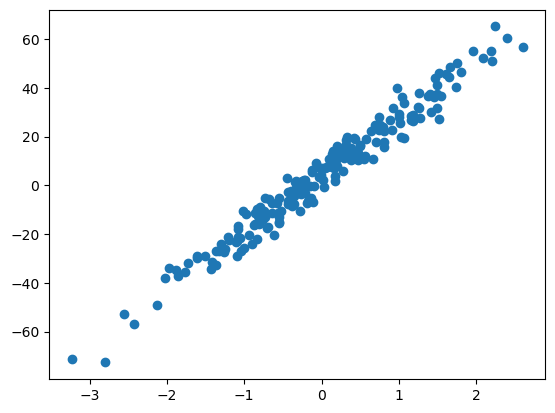

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=200, n_features=1, 
                       bias=5.0, noise=5.0, random_state=123)
y = np.expand_dims(y, axis=1)

plt.scatter(X, y)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    shuffle=True,
                                                    random_state=123)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(160, 1) (160, 1)
(40, 1) (40, 1)


## 모델 생성

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, optimizers, utils

In [18]:
model = keras.Sequential()
model.add(layers.Dense(1, activation='linear', input_shape=(1,)))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


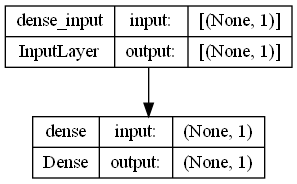

In [22]:
utils.plot_model(model, show_shapes=True, show_layer_names=True)

## 모델 학습

In [23]:
optimizer = optimizers.SGD()
model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
history = model.fit(x_train, y_train, epochs=40)

Epoch 1/40


5/5 [==============================] - 1s 8ms/step - loss: 537.9271 - mae: 18.6239 - mse: 537.9271
Epoch 2/40
5/5 [==============================] - 0s 5ms/step - loss: 432.9178 - mae: 16.7873 - mse: 432.9178
Epoch 3/40
5/5 [==============================] - 0s 7ms/step - loss: 348.9454 - mae: 15.0186 - mse: 348.9454
Epoch 4/40
5/5 [==============================] - 0s 8ms/step - loss: 282.7712 - mae: 13.4707 - mse: 282.7712
Epoch 5/40
5/5 [==============================] - 0s 5ms/step - loss: 229.2416 - mae: 12.1505 - mse: 229.2416
Epoch 6/40
5/5 [==============================] - 0s 5ms/step - loss: 186.6961 - mae: 10.9717 - mse: 186.6961
Epoch 7/40
5/5 [==============================] - 0s 4ms/step - loss: 152.9087 - mae: 9.9402 - mse: 152.9087
Epoch 8/40
5/5 [==============================] - 0s 5ms/step - loss: 126.0148 - mae: 9.0355 - mse: 126.0148
Epoch 9/40
5/5 [==============================] - 0s 5ms/step - loss: 104.4652 - mae: 8.2183 - mse: 104.4652
Epoch 10/40

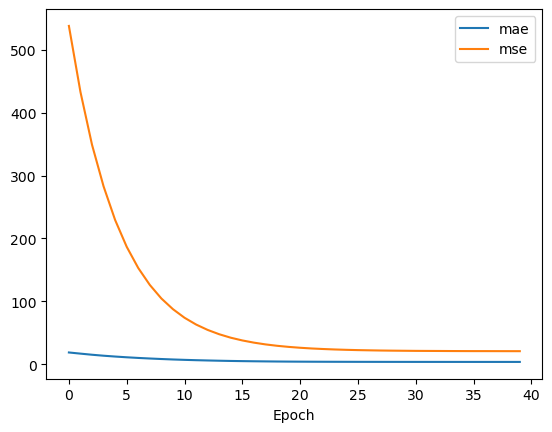

In [24]:
plt.plot(history.history['mae'])
plt.plot(history.history['mse'])
plt.xlabel('Epoch')
plt.legend(['mae', 'mse'])
plt.show();

## 모델 평가

In [25]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 10ms/step - loss: 21.8953 - mae: 3.9864 - mse: 21.8953


[21.895296096801758, 3.9863955974578857, 21.895296096801758]

## 모델 예측

7/7 [==============================] - 0s 3ms/step


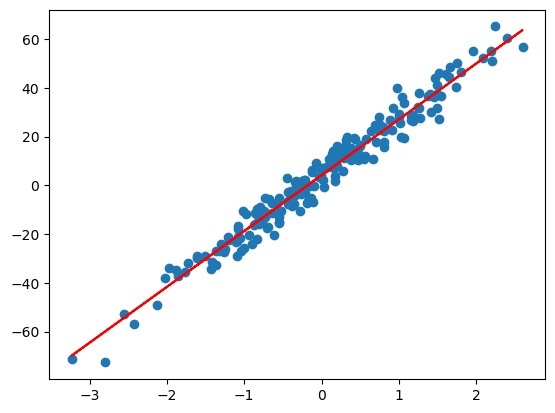

In [26]:
result = model.predict(X)

plt.scatter(X, y)
plt.plot(X, result, 'r')
plt.show()

In [27]:
layer = model.layers[0]
print(layer.name)
layer = model.get_layer('dense')
print(layer.name)

dense
dense


In [28]:
weights, biases = layer.get_weights()
print(weights)
print(biases)

[[22.916592]]
[4.179477]


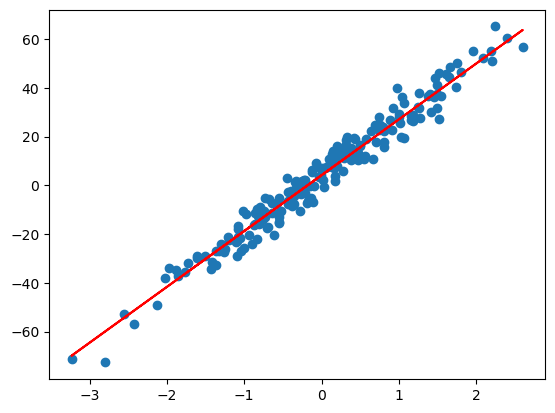

In [29]:
plt.scatter(X, y)
plt.plot(X, np.array(weights * X + biases), 'r')
plt.show()

In [33]:
dot = (X*weights) + biases
dot.max()

63.72374728379159